# 线性模型
## 线性回归
线性回归是一种线性模型，它通过在输入特征和输出之间找到最佳线性关系来建立模型。线性回归的目标是找到一条直线，使得所有样本到直线的距离之和最小。这条直线的方程为：
$$y = w_1x_1 + w_2x_2 + ... + w_nx_n + b$$
其中，$w_1, w_2, ..., w_n$是权重，$b$是偏置。线性回归的损失函数是均方误差：
$$\ell= MSE  = \frac{1}{m}\sum_{i=1}^{m}(y_i - \hat{y}_i)^2$$
其中，$m$是样本数量，$y_i$是真实值，$\hat{y}_i$是预测值。我们的目标是找到一组权重和偏置，使得均方误差最小。我们可以使用梯度下降法来求解。梯度下降法的更新公式为：
$$w = w - \alpha\frac{\partial{MSE}}{\partial{w}}$$



### 最大似然
线性回归的损失函数是均方误差，我们可以通过最大似然估计来推导出均方误差。假设我们的模型是：
$$y =\hat{y}+ \epsilon$$
其中，$\epsilon$是误差项，假设$\epsilon$服从均值为0的正态分布，即$\epsilon \sim N(0, \sigma^2)$。我们可以得到：
$$y \sim N(\hat{y}, \sigma^2)$$
**我们的目标是找到一组参数，使得样本的似然最大(样本出现的概率)**。我们可以得到似然函数：
$$
L=\prod_{i=1}^{m}f(x_i|\theta) = \prod_{i=1}^{m}\frac{1}{\sqrt{2\pi}\sigma}exp(-\frac{(y_i - \hat{y}_i)^2}{2\sigma^2})
$$
对似然函数取对数，得到对数似然函数：
$$\ln L= -\frac{m}{2}log(2\pi) - mlog(\sigma) - \frac{1}{2\sigma^2}\sum_{i=1}^{m}(y_i - \hat{y}_i)^2$$
我们可以看到，对数似然函数的第三项就是均方误差。因此，最大似然估计和均方误差是等价的。
$$\ell = MSE $$


### 梯度下降
我们可以通过梯度下降法来求解线性回归的参数。我们的目标是最小化均方误差，即：
$$
\begin{aligned}
MSE &= \frac{1}{2m}\sum_{i=1}^{m}(y_i - \hat{y}_i)^2\\
\end{aligned}
$$
我们可以对$w$和$b$分别求偏导：
$$
\frac{\partial{\ell}}{\partial{w}} = -\frac{1}{m}\sum_{i=1}^{m}x_i(y_i - \hat{y}_i)\\
$$
最后通过梯度更新参数:
$$
w=w-\eta\frac{\partial{L}}{\partial{w}}
$$


### 正则项
由于参数的数量可能很多，我们需要对参数进行约束，以防止过拟合。我们可以假设参数服从正态分布，即$w \sim N(0, \alpha^2)$。则由贝叶斯公式:
$$
p(y,w)=p(y|w)p(w)
$$
带入似然函数：
$$
\begin{aligned}
\ln L&=\ln \prod_{i=1}^{m}p(y_i|w)p(w)\\
&=\ln \prod_{i=1}^{m}\frac{1}{\sqrt{2\pi}\sigma}exp(-\frac{(y_i - \hat{y}_i)^2}{2\sigma^2})\frac{1}{\sqrt{2\pi}\alpha}exp(-\frac{w^2}{2\alpha^2})\\
\\
&= \sum_{i=1}^{m}(-\frac{1}{2\sigma^2}(y_i - \hat{y}_i)^2) - \frac{1}{2\alpha^2}w^2 - m\ln(\sigma) - \frac{m}{2}\ln(2\pi) - \frac{m}{2}\ln(\alpha)\\
&= -\frac{1}{2\sigma^2}\sum_{i=1}^{m}(y_i - \hat{y}_i)^2- \frac{1}{2\alpha^2}w^2 +C\\
&= -MSE - \frac{1}{2\alpha^2}w^2 +C
\end{aligned}
$$
则我们的目标是最大化$\ln L$，即最小化$MSE + \frac{1}{2\alpha^2}w^2$。我们将$\frac{1}{2\alpha^2}w^2$称为正则项，它可以防止过拟合。我们可以将正则项加入到损失函数中，得到正则化的损失函数：
$$
\ell = MSE + \frac{1}{2\alpha^2}w^2
=MSE+\frac{1}{2\alpha^2}\Vert w \Vert_2$$
其中，$\Vert w \Vert_2$为L2范数，那么
$$
\begin{aligned}
\frac{\partial{L}}{\partial{w}}= &\frac{\partial{MSE}}{\partial{w}} + \frac{1}{\alpha^2}w\\
= & \lambda w+\frac{1}{2\sigma}\sum_{i=1}^{m}x_i(y_i-\hat{y_i})
\end{aligned}
$$
最后就可以使用该梯度公式和梯度下降算法更新参数。\
该线性模型为**Ridge Regressio**n
>为什么假设正态分布:因为正态分布的一个特性是参数在均值(0)附近的概率很大，也就意味着至少部分特征$x_i$的系数绝对值较大，**模型在损失函数和数据的帮助下就可以从数据中选择出会影响结果的特征**,这一点在特征的选择中尤为明显。

**从概率论的角度来看待正则项:我们通过假设参数服从某一分布，就是对参数的分布做一个先验概率估计，从而排服从预估计分布的参数**\
如果假设的先验概率不是正态分布，而是拉普拉斯分布,$w\sim Laplace(\mu,b)$

那么正则项就会变成L1范数
$$
\ell=MSE+\Vert w\Vert_1
$$
此时该线性模型即是**Lasso模型**

In [21]:
import pandas as pd
import numpy as np
data = pd.read_csv('/home/zdw/python/machine_learning/data/regress_data1.csv')
Feature = data['人口']
label = data['收益']

print(f'{data.shape=}\n{Feature.shape=}\n{label.shape=} ')
print(data.head(10))

data.shape=(97, 2)
Feature.shape=(97,)
label.shape=(97,) 
       人口       收益
0  6.1101  17.5920
1  5.5277   9.1302
2  8.5186  13.6620
3  7.0032  11.8540
4  5.8598   6.8233
5  8.3829  11.8860
6  7.4764   4.3483
7  8.5781  12.0000
8  6.4862   6.5987
9  5.0546   3.8166


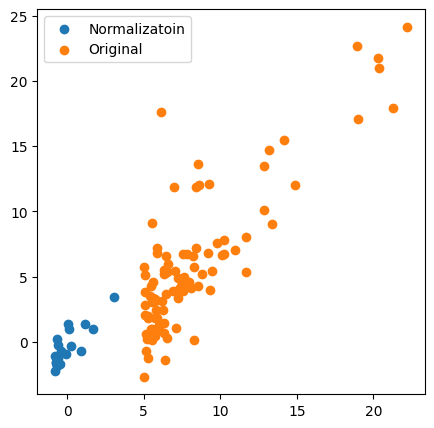

In [30]:
import matplotlib.pyplot as plt

X = None
Y = None
if not isinstance(Feature, np.ndarray) and not isinstance(Y, np.ndarray):
    X = Feature.values.reshape(-1, 1)
    Y = label.values.reshape(-1, 1)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.8)
# normalize data
X_train_mean = X_train.mean()
X_train_std = X_train.std()
X_train = (X_train-X_train_mean)/X_train_std
X_test = (X_test-X_train_mean)/X_train_std
Y_train = (Y_train-X_train_mean)/X_train_std
Y_test = (Y_test-X_train_mean)/X_train_std

train_losses = []
test_losses = []

plt.figure(figsize=(5, 5))
plt.scatter(X_train, Y_train,label='Normalizatoin')
plt.scatter(data['人口'], data['收益'],label='Original')
plt.legend()
plt.show()

Text(0.5, 1.0, 'Linear Regression')

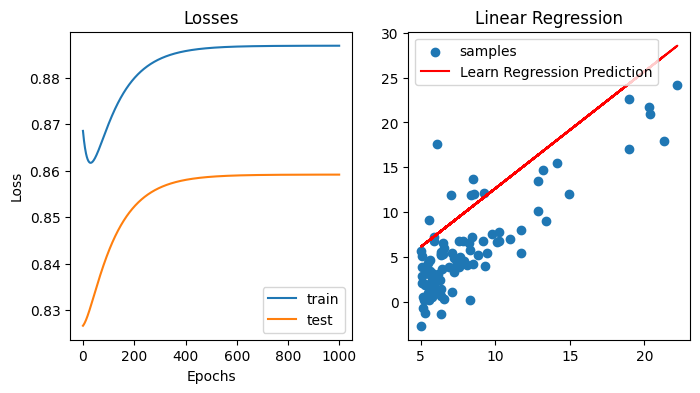

In [31]:
import os
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt


class LinearRegression:
    def __init__(self, lr=0.01):
        self.lr = lr
        self.w = None
        self.b = None

    def init(self, n_features):
        self.w = np.random.randn(n_features, 1)
        self.b = np.random.randn(n_features, 1)

    def loss(self, y_true, y_hat):
        n_samples = y_true.shape[0]
        return np.mean((y_true - y_hat) ** 2)/n_samples+0.5*np.sum(self.w**2)

    def forward(self, X):
        return X@self.w + self.b

    def gradient(self, X, y, n_samples, y_hat, alpha):
        dw = (-1/n_samples) * (X.T@(y - y_hat))-alpha*self.w
        db = (-2/n_samples) * np.sum(y - y_hat)
        return dw, db

    def update(self, X, y, y_hat, n_samples, alpha):
        dw, db = self.gradient(X, y, n_samples, y_hat, alpha)
        self.w -= self.lr * dw
        self.b -= self.lr * db


def fit(model: LinearRegression, X_train, X_test, train_losses, Y_train, Y_test, test_losses, iters, alpha=0.1):
    n_samples, n_features = X_train.shape
    model.init(n_features)
    for _ in range(iters):
        y_hat = model.forward(X_train)
        train_loss = model.loss(Y_train, y_hat)
        train_losses.append(train_loss)
        test_loss = model.loss(Y_test, model.forward(X_test))
        test_losses.append(test_loss)
        model.update(X_train, Y_train, y_hat, n_samples, alpha)
        if test_loss < 0.2:
            np.save('w.npy', model.w)
            np.save('b.npy', model.b)



my_regression = LinearRegression()

fit(my_regression, X_train, X_test, train_losses,
    Y_train, Y_test, test_losses, 1000)

fig, axis = plt.subplots(1, 2, figsize=(8, 4))
axis[0].plot(train_losses)
axis[0].plot(test_losses)
axis[0].set_title('Losses')
axis[0].legend(['train', 'test'])
axis[0].set_xlabel('Epochs')
axis[0].set_ylabel('Loss')
forward = my_regression.forward(X)
axis[1].scatter(X, Y)
axis[1].plot(X, forward, color='red')
axis[1].legend(['samples', 'Learn Regression Prediction'])
axis[1].set_title('Linear Regression')

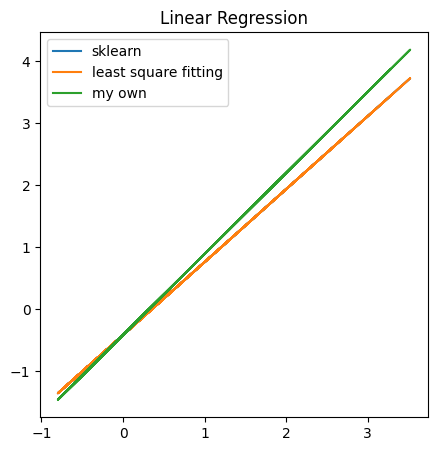

In [32]:
# least square fitting
import sklearn.linear_model
w = np.linalg.inv(X_train.T@X_train)@X_train.T@Y_train
b = Y_train.mean()-w*X_train.mean()
# use sklearn to fit
sklearn_model = sklearn.linear_model.LinearRegression(n_jobs=-1)
sklearn_model.fit(X_train, Y_train)

plt.figure(figsize=(5, 5))
plt.title('Linear Regression')
# sklearn
plt.plot(X_test, sklearn_model.predict(X_test), label='sklearn')
# least square fitting
plt.plot(X_test, w*X_test+b, label='least square fitting')
# my own
plt.plot(X_test, my_regression.forward(X_test), label='my own')
plt.legend()
plt.show()

### Logic Regreesion
逻辑回归是在一般线性回归的基础上添加一个激活函数，将线性回归的输出映射到0-1之间。逻辑回归的模型为：
$$
\mathrm{Sigmoid}(Z)=\frac1{1+e^{-z}}\\\\
y=\mathrm{Sigmoid~}(W^TX)
$$
其中,$W\in\mathcal{R}^{n\times1},X\in\mathcal{R}^{n\times m},Y\in\mathcal{R}^{1\times m}$
如果逻辑回归用于二分类问题，那么输出的概率就是样本为正类的概率，
$$
\begin{aligned}p_+&=\mathrm{y}={\frac1{1+e^{-Z}}}=\frac1{1+e^{-W^TX}}\\p_-&=1-p_+=1-\mathrm{y}\\&=1-\frac1{1+e^{-Z}}={\frac{e^{-Z}}{1+e^{-Z}}}=\frac1{e^Z+1}=\frac1{1+e^{W^TX}}\end{aligned}
$$
使用最大似然估计，假设样本符合伯努利分布，即$X\sim B(n,p)$，那么似然函数为：
$$
Prob(D)=C\prod_{i=1}^mp_i^{y_i}(1-pi)^{1-y_i}
$$
取对数后化简:
$$
\begin{aligned}\ln(\operatorname{Prob}(D))=\ln\left(\prod_{i=1}^mp_i^{y_i}(1-p_i)^{1-y_i}\right)\\=\sum_{i=1}^m\ln(p_i^{y_i}(1-p_i)^{1-y_i})\\=\sum_{i=1}^m\left[\ln(p_i^{y_i})+\ln((1-p_i)^{1-y_i})\right]\\\boxed{=\sum_{i=1}^my_i\ln(p_i)+(1-y_i)\ln(1-p_i)}\\=\sum_{i=1}^my_i\ln\left(\frac{p_i}{1-p_i}\right)+\ln(1-p_i)\end{aligned}
$$
被框出来的部分就是逻辑回归的损失函数，我们的目标是最大化该损失函数，即最小化负的损失函数，即：
$$
\ell=-\sum_{i=1}^my_i\ln(p_i)+(1-y_i)\ln(1-p_i)
$$
带入求导后得到梯度下降的更新公式：
$$
\frac{\partial\ell}{\partial W}==\sum_{i=1}^n(p_i-y_i)\boldsymbol{x}_i
$$


#### odds
odds(几率)被定义为:
$$
odds=\frac{p_+}{p_-}=\frac{p_+}{1-p_+}
$$
那么在逻辑回归中，我们可以得到odds的表达式:
$$
\begin{aligned}odds=\frac{p_+}{p_-}=\frac{\frac{1}{1+e^{-Z}}}{\frac{e^{-Z}}{1+e^{-Z}}}=e^Z\end{aligned}
$$
取对数可以得到
$$
\ln(odds)=Z=W^TX
$$

In [39]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
data=pd.read_csv('data/ex2data1.txt',header=None)
feature=data[[0,1]]
label=data[2]
data.columns, feature.shape, label.shape

(Index([0, 1, 2], dtype='int64'), (100, 2), (100,))

In [56]:
X = feature.values
Y = label.values.reshape(-1, 1)

X_test, X_train, Y_test, Y_train = train_test_split(X, Y, test_size=0.8)
# normalize data
X_train_mean = X_train.mean()
X_train_std = X_train.std()
X_train = (X_train - X_train_mean) / X_train_std
X_test = (X_test - X_train_mean) / X_train_std


print(f"{X_train.shape=}\n{Y_train.shape=}\n{X_test.shape=}\n{Y_test.shape=}")

X_train.shape=(80, 2)
Y_train.shape=(80, 1)
X_test.shape=(20, 2)
Y_test.shape=(20, 1)


my_regression.w.shape=(2, 1)


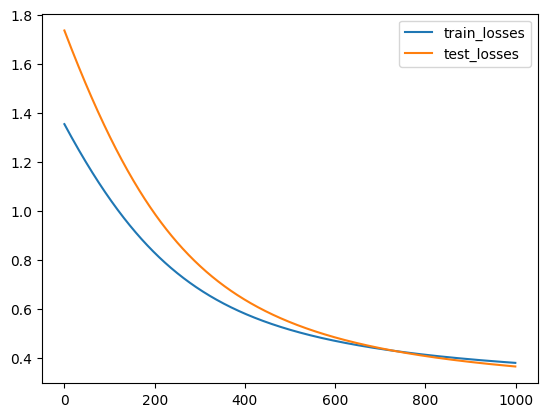

In [62]:
class LogicRegression:
    def __init__(self, feature, label) -> None:
        self.w = np.random.randn(feature.shape[1], 1)

    def forward(self, X):
        return self.sigmoid(X@self.w)

    def sigmoid(self, x):
        return 1/(np.exp(-x)+1)

    def loss(self, y_true, y_pred):
        return -np.mean(y_true*np.log(y_pred)+(1-y_true)*np.log(1-y_pred))

    def gradient(self, X, y, y_pred):
        n_samples = y.shape[0]
        dw = (1/n_samples)*(X.T@(y_pred-y))
        return dw

    def update(self, X, y, y_pred,lr=0.01):
        dw=self.gradient(X,y,y_pred)
        self.w-=lr*dw


train_losses = []
predicts=[]
test_losses = []
my_regression=LogicRegression(X_train,Y_train)
print(f"{my_regression.w.shape=}")
iters=1000
for _ in range(iters):
    y_pred=my_regression.forward(X_train)
    predicts.append(y_pred)
    train_los=my_regression.loss(Y_train,y_pred)
    train_losses.append(train_los)
    test_loss=my_regression.loss(Y_test,my_regression.forward(X_test))
    test_losses.append(test_loss)
    my_regression.update(X_train,Y_train,y_pred)
plt.plot(train_losses,label='train_losses')
plt.plot(test_losses,label='test_losses')
plt.legend()
plt.show()

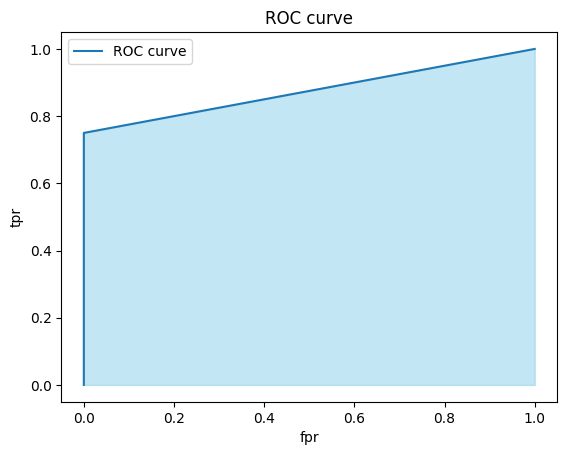

In [66]:
from sklearn.metrics import accuracy_score,roc_auc_score,roc_curve
y_pred=my_regression.forward(X_test)
y_pred[y_pred>=0.5]=1
y_pred[y_pred<0.5]=0
acc=accuracy_score(Y_test,y_pred)
fpr,tpr,thresholds=roc_curve(Y_test,y_pred)
auc=roc_auc_score(Y_test,y_pred)
plt.plot(fpr,tpr,label='ROC curve')
plt.title("ROC curve")
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.legend()
plt.fill_between(x=fpr,y1=tpr,y2= 0, color='skyblue', alpha=0.5)
plt.show()